4.2.1 損失関数

In [3]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [7]:
#[2]が正解の時
t = [0,0,1,0,0,0,0,0,0,0]
#例１：2の確率が最も高いとき
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
#例2：7の確率が最も高いとき
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

#小さいほうが精度良い

0.09750000000000003
0.5975


4.2.2 交差エントロピー誤差

In [9]:
#tはone-hot表現
def cross_entropy_error(y, t):
    delta = 1e-7 #log(0)を回避するため
    return -np.sum(t * np.log(y+delta))

In [10]:
#[2]が正解の時
t = [0,0,1,0,0,0,0,0,0,0]
#例１：2の確率が最も高いとき
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
#例2：7の確率が最も高いとき
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

#小さいほうが精度良い

0.510825457099338
2.302584092994546


4.2.3　ミニバッチ学習

In [12]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = \
    load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [13]:
train_size = x_train.shape[0]
batch_size = 10
#0~trainsizeの中からランダムにbatch_size分取得
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

4.2.4 バッチに対応させた交差エントロピー誤差の実装

In [16]:
#tはラベル表現
def cross_entropy_error(y,t):
    #もしデータが一つの場合
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    #正解のラベルのみ取得して交差エントロピーを計算
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size

4.3.1 微分

In [17]:
#悪い数値微分の実装例
#hが小さすぎて丸め誤差が生じる
#xでの傾きでなく、x+hとxの間での傾きとなっている
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [27]:
#数値微分の改善例
#hの値を1e-4に
#中心差分を用いる
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

4.3.2 数値微分の例(y = 0.01*x^2 + 0.1x)

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

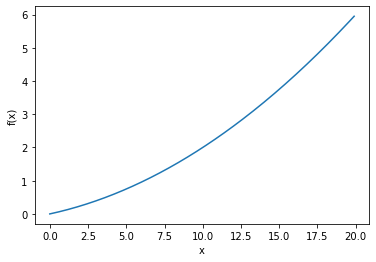

In [29]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [30]:
#厳密解　＝　0.2
numerical_diff(function_1, 5)

0.1999999999990898

In [31]:
#厳密解　＝　0.3
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


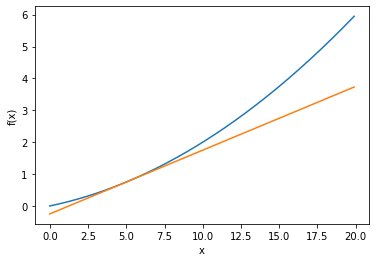

In [32]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

# lambda式（わざわざ関数の形にかくまでもないもの）を返す
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

4.3.3 偏微分

In [34]:
def function_2(x):
    return x[0]**2 + x[1]**2
    #np.sum(x**2)

In [36]:
#x[0] = 3.0 x[1] = 4.0の時のx[0]に対する偏微分
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [37]:
#x[0] = 3.0 x[1] = 4.0の時のx[1]に対する偏微分
def function_tmp2(x1):
    return 3.0**2 + x1**2.0
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [38]:
#偏微分をベクトルとしてまとめたもの=勾配
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val #値を元に戻す
    
    return grad

In [40]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [41]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [42]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

4.4.1 勾配降下法の実装

In [45]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        #勾配を求める
        grad = numerical_gradient(f,x)
        #勾配と逆方向に進む
        x -= lr * grad
    
    return x

f(x0,x1) = x0^2+x1^2の最小値を勾配法で求める

In [46]:
#正解は0,0
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [48]:
init_x = np.array([-3.0, 4.0])
#学習率が大きすぎると
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [49]:
init_x = np.array([-3.0, 4.0])
#学習率が小さすぎると
gradient_descent(function_2, init_x=init_x, lr=-10.0, step_num=100)

array([-2.63011810e+12,  3.08739746e+12])